In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.formula.api as sm  


In [3]:
print(sns.get_dataset_names())
#Printing the available datasets names

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [4]:
df = sns.load_dataset('iris')
#Displaying the first five rows of the dataset
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
print(df.info())
print("\n ========================== Desriptive Statistics ========================== ")
print(df.describe())
print("\n ========================== Checking for Missing Values ========================== ")
print(df.isnull().sum())

<class 'pandas.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    str    
dtypes: float64(4), str(1)
memory usage: 6.0 KB
None

 ========================== Desriptive Statistics ========================== 
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.8

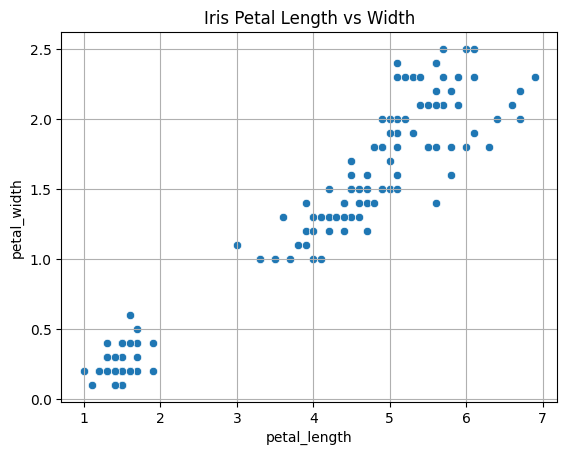

In [6]:
sns.scatterplot(data =df, x = 'petal_length', y = 'petal_width')
plt.title('Iris Petal Length vs Width')
plt.grid()
plt.show()
plt.close()
# Scatter plot showing the Linear relationship between petal length and petal width

Text(0.5, 1.0, 'Iris Petal Length vs Width with Regression Line')

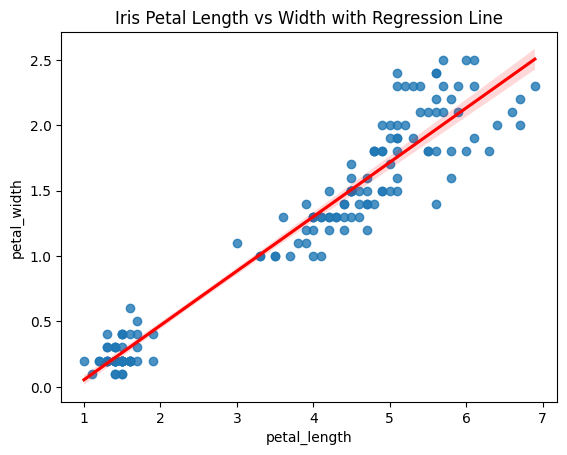

In [7]:
sns.regplot(data =df, x = 'petal_length', y = 'petal_width', line_kws={"color":"r"})
# Scatter plot with regression line showing the Linear relationship between petal length and petal width
plt.title('Iris Petal Length vs Width with Regression Line')

In [8]:
#Building a simple linear regression model
# Defining the feature and target variable
X = df[['petal_length']]
y = df['petal_width']

In [9]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

df['Error'] = y - y_pred
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)
print(f"R_squared: {model.score(X, y)}")

Coefficient: 0.41575541635241153
Intercept: -0.3630755213190291
R_squared: 0.9271098389904927


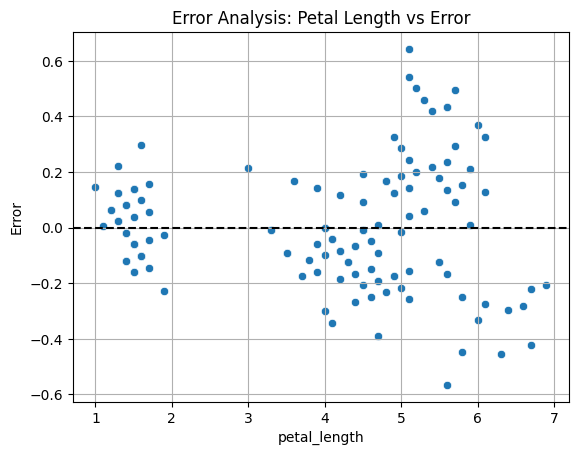

In [10]:
#Error Analysis
sns.scatterplot(data =df, x = 'petal_length', y = 'Error')
plt.axhline(0, color='black', linestyle='--')
plt.title('Error Analysis: Petal Length vs Error')
plt.grid()
plt.show()
plt.close()

In [11]:
new_df = df.copy()
new_df.rename(columns={'petal_width':'Y', 'petal_length':'X'}, inplace=True)
result = sm.ols(formula='Y ~ X', data=new_df).fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           4.68e-86
Time:                        21:51:38   Log-Likelihood:                 24.796
No. Observations:                 150   AIC:                            -45.59
Df Residuals:                     148   BIC:                            -39.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3631      0.040     -9.131      0.0